SVM -- Support Vector Machines

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('data.csv')

In [19]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [21]:
M = data[data.diagnosis == 'M']
B = data[data.diagnosis == 'B']

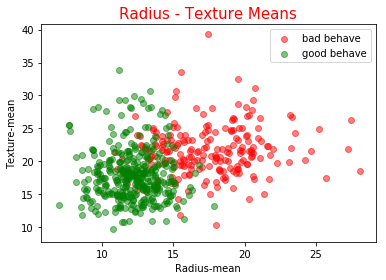

In [22]:
plt.scatter(M.radius_mean, M.texture_mean, color = 'red', label = 'bad behave', alpha = 0.5)
plt.scatter(B.radius_mean, B.texture_mean, color = 'green', label = 'good behave', alpha = 0.5)
plt.xlabel("Radius-mean")
plt.ylabel("Texture-mean")
plt.title("Radius - Texture Means", color = 'red', fontsize = 15)
plt.legend()
plt.show()

In [23]:
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]

In [24]:
x_data = data.drop('diagnosis', axis = 1 )
y = data.diagnosis.values

In [25]:
#normalization of x features
x = (x_data - np.mean(x_data)) / (np.max(x_data) - np.min(x_data))

In [26]:
#train - test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [27]:
# svm

from sklearn.svm import SVC
svm = SVC(random_state = 1)


In [28]:
svm.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
print("SVM accuracy: {}".format(svm.score(x_test, y_test)))

SVM accuracy: 0.9590643274853801
